In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import zipfile
%matplotlib inline
#plt.style.use('ggplot')

In [102]:
zf = zipfile.ZipFile('/Users/isabella/gal/assignments/casestudy/Pandas-EDA-CaseStudy/data/archive.zip') 
us_videos = pd.read_csv(zf.open('USvideos.csv'))


can we break up the tags column and examine the most common tags? most successful tags?

time between publish time and trending date
    by channel?
    by most views
    by likes/engagement
Relationship between likes and comment_count
channels with highest engagement: likes/view and comment_count/view
Characters used in titles?

people from different regions interact differently 
    like to dislike ratio (are some people more vindictive?)
time of upload (group by each creator). does the time of upload affect whether people will see the video
views vs population size (which regions watch the most youtubes)
what tags are the most viewed? 
    amount of tags? like to dislike ratio

In [103]:
#Only 23 videos where there was a video error or removed. Choosing to remove from dataset and ignore these videos

us_videos[us_videos['video_error_or_removed']==True].count()
us_videos = us_videos[us_videos['video_error_or_removed']==False]


In [104]:
#examine videos whith disabled comments or ratings separately
us_engagement_disabled = us_videos[(us_videos['ratings_disabled'] == True) | (us_videos['comments_disabled'] == True)]

#696 videos where some form of enegagement was disabled. Removing from main data
us_videos = us_videos[(us_videos['ratings_disabled'] == False) | (us_videos['comments_disabled'] == False)]
us_videos.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


In [105]:
us_videos = us_videos.groupby('video_id')[['title', 'channel_title','views', 'likes', 'dislikes', 'comment_count']].max()


In [106]:
# engagement indicators
us_videos['likes_dislikes_per_view'] = (us_videos['likes'] + us_videos['dislikes'] ) / us_videos['views']
us_videos['comments_per_view'] = (us_videos['comment_count'] ) / us_videos['views']


In [107]:
engagement_ind = us_videos[['title', 'likes_dislikes_per_view', 'comments_per_view']]
print(engagement_ind.mean())
print(engagement_ind.std())
print(engagement_ind.max())

#Low enegagement rates

likes_dislikes_per_view    0.031334
comments_per_view          0.004145
dtype: float64
likes_dislikes_per_view    0.024681
comments_per_view          0.005265
dtype: float64
title                      😱 $1,145 iPhone Case!!
likes_dislikes_per_view                  0.220729
comments_per_view                       0.0941438
dtype: object


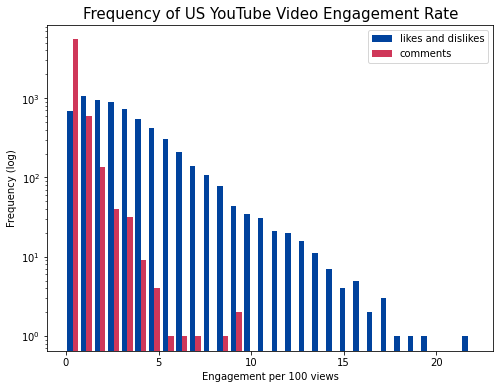

In [109]:
x_likes = engagement_ind['likes_dislikes_per_view']*100
x_comments = engagement_ind['comments_per_view']*100

fig, ax = plt.subplots(figsize=(8, 6))

ax.hist([x_likes, x_comments], 30, color=['#00429d', '#cf3759'], log=True, label=['likes and dislikes', 'comments'])
ax.legend()
ax.set_title("Frequency of US YouTube Video Engagement Rate", fontsize= 15)
ax.set_xlabel("Engagement per 100 views", fontsize= 10)
ax.set_ylabel("Frequency (log)", fontsize= 10)
fig.canvas.draw_idle()
fig.savefig('/Users/isabella/gal/assignments/casestudy/Pandas-EDA-CaseStudy/images/engagement_hist.png')

In [110]:
#which videos have the highest engagement rate 
engagement_ind = us_videos[['title', 'channel_title','likes_dislikes_per_view', 'comments_per_view']]

engagement_ind_likes = engagement_ind.sort_values(by=['likes_dislikes_per_view'], ascending=False)
engagement_ind_likes = engagement_ind_likes.reset_index()
#top ten likes and dislikes per view
top_10_like_vid = engagement_ind_likes.loc[engagement_ind_likes.index[:10], ['title','likes_dislikes_per_view']]


In [111]:
top_10_like_vid.index += 1 
print(top_10_like_vid.to_markdown())
#pip install tabulate <- if this doesn't work, install

|    | title                                          |   likes_dislikes_per_view |
|---:|:-----------------------------------------------|--------------------------:|
|  1 | Shawn Mendes: The Tour - Official Trailer      |                  0.220729 |
|  2 | PSA from Chairman of the FCC Ajit Pai          |                  0.197397 |
|  3 | CRISTIANO RONALDO E FRED, O GRANDE ENCONTRO    |                  0.189541 |
|  4 | GOALS GOALS GOALS                              |                  0.18375  |
|  5 | Niall Horan - On The Loose (Lyric Video)       |                  0.173013 |
|  6 | Harry Styles - Kiwi (live in studio)           |                  0.17093  |
|  7 | BTS Takes on L.A. | Vogue                      |                  0.170105 |
|  8 | BTS (방탄소년단) 'FAKE LOVE' Official Teaser 2 |                  0.164283 |
|  9 | THINGS THAT ARE LOWER                          |                  0.163864 |
| 10 | From Dream to Reality                          |                  0.160991

In [112]:
engagement_ind_comments = engagement_ind.sort_values(by=['comments_per_view'], ascending=False)
engagement_ind_comments = engagement_ind_comments.reset_index()
#top ten comments per view
top_10_comment_vid = engagement_ind_comments.loc[engagement_ind_comments.index[:10], ['title','comments_per_view']]

In [113]:
top_10_comment_vid.index += 1 
print(top_10_comment_vid.to_markdown())

|    | title                                                      |   comments_per_view |
|---:|:-----------------------------------------------------------|--------------------:|
|  1 | FULL FACE USING 7-ELEVEN MAKEUP!                           |           0.0941438 |
|  2 | NEW WET N WILD 'GOTH-O-GRAPHIC' COLLECTION | HIT OR MISS?! |           0.0882932 |
|  3 | FULL FACE OF MAKEUP IM THROWING OUT 2018                   |           0.0861341 |
|  4 | #ProudToCreate: Pride 2018                                 |           0.0679747 |
|  5 | STRANGERS DO MY MAKEUP ON HOLLYWOOD BOULEVARD              |           0.064245  |
|  6 | BEST MAKEUP OF 2017!                                       |           0.054504  |
|  7 | $11.99 FOUNDATION VS. $40 FOUNDATION: Who Wins ???         |           0.0508288 |
|  8 | Melting Every Lipstick From Sephora Together               |           0.0501962 |
|  9 | You, but in emojis. (YIAY #375)                            |           0.0474712 |
| 10 | 18 

In [114]:
us_channel_group = us_videos.groupby('channel_title')[['views','likes','dislikes','comment_count']].sum()
# engagement indicators
us_channel_group['likes_dislikes_per_view'] = (us_channel_group['likes'] + us_channel_group['dislikes'] ) / us_channel_group['views']
us_channel_group['comments_per_view'] = us_channel_group['comment_count']  / us_channel_group['views']



In [115]:
#which channels have the highest engagement rate 
channel_engagement_ind = us_channel_group[['likes_dislikes_per_view', 'comments_per_view']]

channel_engagement_ind_like = channel_engagement_ind.sort_values(by=['likes_dislikes_per_view'], ascending=False)
channel_engagement_ind_like = channel_engagement_ind_like.reset_index()

#top ten likes and dislikes per view
top_10_like_channel = channel_engagement_ind_like.loc[channel_engagement_ind_like.index[:10], ['channel_title','likes_dislikes_per_view']]


In [116]:
top_10_like_channel.index += 1 
print(top_10_like_channel.to_markdown())

|    | channel_title    |   likes_dislikes_per_view |
|---:|:-----------------|--------------------------:|
|  1 | Daily Caller     |                  0.197397 |
|  2 | Desimpedidos     |                  0.189541 |
|  3 | KickThePj        |                  0.18375  |
|  4 | Amber Liu        |                  0.163864 |
|  5 | Max Joseph       |                  0.160991 |
|  6 | Scotty Sire      |                  0.143784 |
|  7 | Caspar           |                  0.141834 |
|  8 | ConnorFranta     |                  0.139945 |
|  9 | Smyang Piano     |                  0.137142 |
| 10 | Henry Prince Mak |                  0.128749 |


In [117]:
channel_engagement_ind_comment = channel_engagement_ind.sort_values(by=['comments_per_view'], ascending=False)
channel_engagement_ind_comment = channel_engagement_ind_comment.reset_index()

#top ten likes and dislikes per view
top_10_comment_channel = channel_engagement_ind_comment.loc[channel_engagement_ind_comment.index[:10], ['channel_title','comments_per_view']]


In [118]:
top_10_comment_channel.index += 1 
print(top_10_comment_channel.to_markdown())

|    | channel_title           |   comments_per_view |
|---:|:------------------------|--------------------:|
|  1 | Manny Mua               |           0.0494561 |
|  2 | GingerPale              |           0.0422106 |
|  3 | Bethany Mota            |           0.039281  |
|  4 | Jessii Vee              |           0.0366854 |
|  5 | Caravan Carolyn         |           0.034887  |
|  6 | Mark Ferris             |           0.031746  |
|  7 | RawBeautyKristi         |           0.0316663 |
|  8 | Laura Lee               |           0.0302555 |
|  9 | DanTDM                  |           0.02969   |
| 10 | Jessica Kellgren-Fozard |           0.0291707 |


In [119]:
x_mean = (us_videos['likes_dislikes_per_view'].mean())*100
y_mean = (us_videos['comments_per_view'].mean())*100

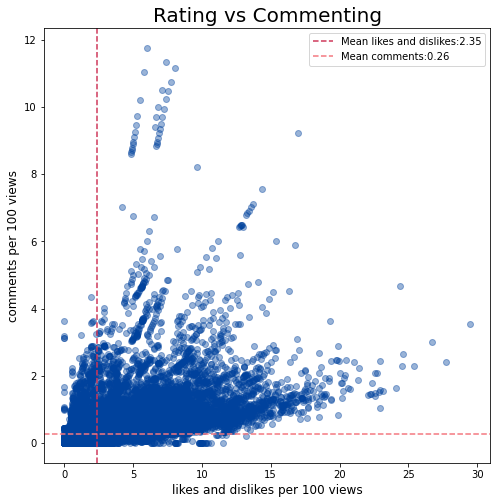

In [148]:
x = us_videos['likes_dislikes_per_view']*100
y = us_videos['comments_per_view']*100

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x, y, color = '#00429d', alpha=.4)
ax.set_title("Rating vs Commenting", fontsize= 20)
ax.set_xlabel("likes and dislikes per 100 views", fontsize= 12)
ax.set_ylabel("comments per 100 views", fontsize= 12)

plt.axvline(x_mean, label = f'Mean likes and dislikes:{x_mean:.2f}', linestyle = '--', color = '#cf3759')
plt.axhline(y_mean, label = f'Mean comments:{y_mean:.2f}', linestyle = '--', color = '#f4777f')
ax.legend()

fig.canvas.draw_idle()
fig.savefig('/Users/isabella/gal/assignments/casestudy/Pandas-EDA-CaseStudy/images/us_engagement_scat.png')

In [125]:
#correlation between likes and comments
us_videos[['likes_dislikes_per_view','comments_per_view']].corr()

,likes_dislikes_per_view,comments_per_view
likes_dislikes_per_view,1.000000,0.441091
comments_per_view,0.441091,1.000000


In [127]:
#Look at relationship between engagement and tags

In [128]:
#Bringing in other countries
us_videos = pd.read_csv(zf.open('USvideos.csv'))
ca_videos = pd.read_csv(zf.open('CAvideos.csv'))
de_videos = pd.read_csv(zf.open('DEvideos.csv'))
fr_videos = pd.read_csv(zf.open('FRvideos.csv'))
gb_videos = pd.read_csv(zf.open('GBvideos.csv'))
in_videos = pd.read_csv(zf.open('INvideos.csv'))
#jp_videos = pd.read_csv(zf.open('JPvideos.csv'))
#kr_videos = pd.read_csv(zf.open('KRvideos.csv'))
#mx_videos = pd.read_csv(zf.open('MXvideos.csv'))
#ru_videos = pd.read_csv(zf.open('RUvideos.csv'))



In [129]:
country_dict = {'us':'USA', 'ca':'Canada', 'de':'Germany', 'fr':'France', 
               'gb': 'Great Britain', 'in': 'India'}
list_countries = ['USA', 'Canada', 'Germany', 'France', 'Great Britain', 'India' ]

all_videos = pd.DataFrame()
list_videos = [us_videos, ca_videos, de_videos, fr_videos, gb_videos, in_videos]

for i, n in zip(list_videos, list_countries):
    i['country'] = n
    all_videos = all_videos.append(i)
    


In [130]:
#remove videos with error or removed
all_videos[all_videos['video_error_or_removed']==True].count() #166 videos 
all_videos = all_videos[all_videos['video_error_or_removed']==False]

#data frame to examine videos with engagement disabled
all_engagement_disabled = all_videos[(all_videos['ratings_disabled'] == True) | (all_videos['comments_disabled'] == True)]

#keeping only videos with ratings and comments enabled
all_videos = all_videos[(all_videos['ratings_disabled'] == False) | (all_videos['comments_disabled'] == False)]


In [131]:
for i in list_videos:
    i[i['video_error_or_removed']==True].count()
    i = i[i['video_error_or_removed']==False]
    i = i[(i['ratings_disabled'] == False) | (i['comments_disabled'] == False)]

    

In [132]:

for i in list_videos:
    i = i.groupby('video_id')[['title', 'channel_title','views', 'likes', 'dislikes', 'comment_count']].max()


In [133]:
# engagement indicators
for i in list_videos:
    i['likes_dislikes_per_view'] = (i['likes'] + i['dislikes'] ) / i['views']
    i['comments_per_view'] = (i['comment_count'] ) / i['views']
    

In [143]:
for i in list_videos:
    i.reset_index()
    print(i[['likes_dislikes_per_view','comments_per_view']].corr())

                         likes_dislikes_per_view  comments_per_view
likes_dislikes_per_view                 1.000000           0.465189
comments_per_view                       0.465189           1.000000
                         likes_dislikes_per_view  comments_per_view
likes_dislikes_per_view                  1.00000            0.48639
comments_per_view                        0.48639            1.00000
                         likes_dislikes_per_view  comments_per_view
likes_dislikes_per_view                 1.000000           0.456485
comments_per_view                       0.456485           1.000000
                         likes_dislikes_per_view  comments_per_view
likes_dislikes_per_view                 1.000000           0.496083
comments_per_view                       0.496083           1.000000
                         likes_dislikes_per_view  comments_per_view
likes_dislikes_per_view                 1.000000           0.533461
comments_per_view                       0.533461

In [135]:
country_dict = {'us':'USA', 'ca':'Canada', 'de':'Germany', 'fr':'France', 
               'gb': 'Great Britain', 'in': 'India'}


country = list(country_dict.keys())
x_list = []
for i, j in zip(country, list_videos):
    i = pd.DataFrame(j)
    x_list.append(i)

x_list_likes = []
for df in x_list:
    df = df['likes_dislikes_per_view']*100
    x_list_likes.append(df)
y_list_comment = []
for df in x_list:
    df = df['comments_per_view']*100
    y_list_comment.append(df)


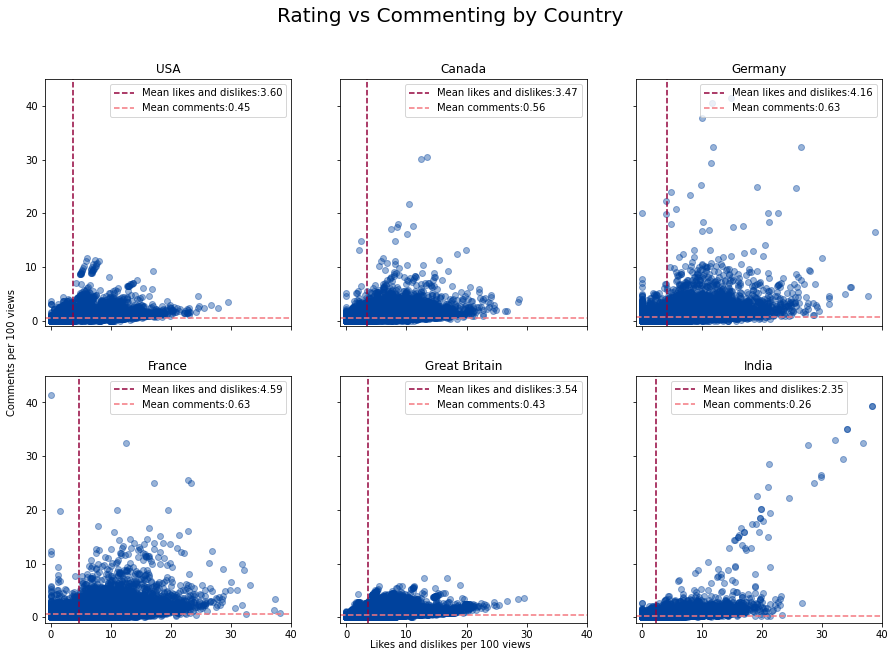

In [140]:
list_countries = ['USA', 'Canada', 'Germany', 'France', 'Great Britain', 'India' ]
list_videos = [us_videos, ca_videos, de_videos, fr_videos, gb_videos, in_videos]

#create multiple scatterplots by country
fig, axs = plt.subplots(2, 3, figsize=(15, 10), sharex = True, sharey= True)



for name, x, y, ax in zip(list_countries, x_list_likes, y_list_comment, axs.flatten()):
    ax.scatter(x, y, color = '#00429d', alpha=.4)
    ax.set(xlim=(-1,40), ylim=(-1,45))
    ax.set_title(f"{name}")
    x_mean = x.mean()
    y_mean = y.mean()
    ax.axvline(x_mean, label = f'Mean likes and dislikes:{x_mean:.2f}', linestyle = '--', color = '#93003a')
    ax.axhline(y_mean, label = f'Mean comments:{y_mean:.2f}', linestyle = '--', color = '#f4777f')
    ax.legend()
    
fig.suptitle('Rating vs Commenting by Country', fontsize=20, x=.5)
fig.text(0.5, 0.09, 'Likes and dislikes per 100 views', ha='center')
fig.text(0.09, 0.5, 'Comments per 100 views', va='center', rotation='vertical')


fig.canvas.draw_idle()
fig.savefig('/Users/isabella/gal/assignments/casestudy/Pandas-EDA-CaseStudy/images/country_engagement_scat.png')


In [141]:
all_videos_grouped = all_videos.groupby(['video_id','country'])[['title', 'channel_title','views', 'likes', 'dislikes', 'comment_count']].max()
all_videos_grouped['likes_dislikes_per_view'] = (all_videos_grouped['likes'] + all_videos_grouped['dislikes'] ) / all_videos_grouped['views']
all_videos_grouped['comments_per_view'] = (all_videos_grouped['comment_count'] ) / all_videos_grouped['views']



,likes_dislikes_per_view,comments_per_view
likes_dislikes_per_view,1.000000,0.501724
comments_per_view,0.501724,1.000000


In [144]:

all_videos_grouped.reset_index
all_countries = all_videos_grouped.groupby('country')[['likes_dislikes_per_view', 'comments_per_view']].mean()

x = all_countries.index.tolist()


In [145]:
#reorder the index to get bars in the right order 
all_countries = all_countries.reindex(list_countries)
all_countries.reset_index()


,country,likes_dislikes_per_view,comments_per_view
0,USA,0.031334,0.004145
1,Canada,0.031566,0.005432
2,Germany,0.038569,0.006292
3,France,0.042232,0.006305
4,Great Britain,0.032245,0.004128
5,India,0.019781,0.002383


Text(0.5, 0.93, 'Average YouTube Video Engagement Rates By Country')

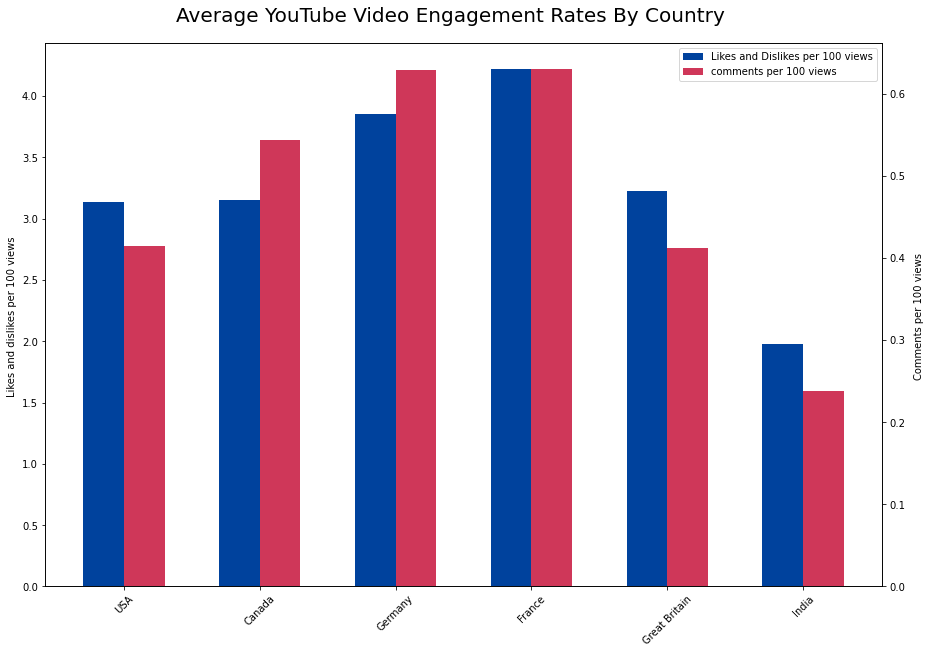

In [146]:
fig, ax1 = plt.subplots(figsize=(15, 10))
x = all_countries.index.tolist()

x = np.arange(len(all_countries.index.tolist()))
ax1 = plt.subplot(1,1,1)
w = 0.3
#plt.xticks(), will label the bars on x axis with the respective country names.
plt.xticks(x + w /2, all_countries.index.tolist(), rotation=45)
like =ax1.bar(x, all_countries['likes_dislikes_per_view']*100, width=w, color='#00429d', align='center')
#The trick is to use two different axes that share the same x axis, we have used ax1.twinx() method.
ax2 = ax1.twinx()
comment =ax2.bar(x + w, all_countries['comments_per_view'] * 100, width=w,color='#cf3759',align='center')

plt.legend([like, comment],['Likes and Dislikes per 100 views', 'comments per 100 views'])

fig.text(.09, .5, 'Likes and dislikes per 100 views',  va='center', rotation='vertical')
fig.text(.93, 0.5, 'Comments per 100 views', va='center', rotation='vertical')

fig.suptitle("Average YouTube Video Engagement Rates By Country", fontsize= 20, x=.5, y=.93)


In [147]:
fig.canvas.draw_idle()
fig.savefig('/Users/isabella/gal/assignments/casestudy/Pandas-EDA-CaseStudy/images/average_engagement_by_country.png')

